In [3]:
import numpy as np
import pandas as pd


In [4]:
prets = pd.read_csv("https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets.csv")
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


In [5]:
prets['taux_endettement'] = round(prets['remboursement'] * 100 / prets['revenu'], 2)

In [6]:
prets.rename(columns={'taux':'taux_interet'}, inplace=True)

In [7]:
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80


In [8]:
prets['cout_total'] = prets['remboursement'] * prets['duree']
prets['benefices'] = round((prets['cout_total'] * prets['taux_interet']/100)/(24), 2)

In [9]:
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57


In [10]:
prets.sort_values('benefices', ascending=False).head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
8,7,NICE,6000,5486.0,2956.95,300,immobilier,1.184,53.9,887085.0,437.63
23,22,NICE,6300,5838.0,3018.25,240,immobilier,1.229,51.7,724380.0,370.94
186,173,PARIS,75006,6784.0,3744.77,180,immobilier,1.248,55.2,674058.6,350.51
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140,57.1,698630.4,331.85
181,168,PARIS,75003,6366.0,2807.41,240,immobilier,1.176,44.1,673778.4,330.15


In [11]:
prets.loc[prets['type']== 'automobile', ['identifiant', 'revenu']].head() 

,identifiant,revenu
1,1,5310.0
65,63,4114.0
67,64,4326.0
87,83,2207.0
100,95,6069.0


In [12]:
prets.loc[prets['revenu'] > 4000, :]

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97
8,7,NICE,6000,5486.0,2956.95,300,immobilier,1.184,53.90,887085.0,437.63
16,15,PARIS,75003,4109.0,1220.37,240,immobilier,1.272,29.70,292888.8,155.23
17,16,PARIS,75001,6118.0,1505.03,240,immobilier,1.211,24.60,361207.2,182.26
...,...,...,...,...,...,...,...,...,...,...,...
234,219,PARIS,75017,6257.0,1820.79,300,immobilier,1.095,29.10,546237.0,249.22
236,221,PARIS,75017,4477.0,1356.53,240,immobilier,1.132,30.30,325567.2,153.56
239,224,PARIS,75008,5118.0,1248.79,300,immobilier,1.206,24.40,374637.0,188.26
240,224,PARIS,75008,5118.0,238.20,25,automobile,3.423,4.65,5955.0,8.49


In [13]:
prets.loc[(prets['revenu'] > 4000) & (prets['type']== 'automobile'), :]

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
1,1,PARIS,75009,5310.0,240.0,64,automobile,3.701,4.52,15360.0,23.69
65,63,NICE,6300,4114.0,302.9,24,automobile,3.092,7.36,7269.6,9.37
67,64,LYON,69004,4326.0,236.1,46,automobile,3.124,5.46,10860.6,14.14
100,95,PARIS,75016,6069.0,341.4,24,automobile,3.644,5.63,8193.6,12.44
106,101,LYON,69008,4737.0,214.8,47,automobile,3.487,4.53,10095.6,14.67
240,224,PARIS,75008,5118.0,238.2,25,automobile,3.423,4.65,5955.0,8.49


In [14]:
prets.groupby(['ville', 'type']).sum()

identifiant       CP    revenu  remboursement  duree  \
ville     type                                                               
BORDEAUX  immobilier         1718   531800   50816.0       15330.59   3660   
LYON      automobile          360   207018   11531.0         788.80    131   
          immobilier         2473  1725116   83823.0       25275.87   6120   
MARSEILLE automobile          404    39031    5842.0         839.60    160   
          immobilier         7542   936701  140084.0       40056.12  16260   
NICE      automobile          187    12300    7607.0         612.80     80   
          immobilier         2188   116800   77681.0       22931.44   4380   
PARIS     automobile          612   375054   22834.0        1426.60    246   
          immobilier         9237  5400965  312625.0       92626.01  16440   
TOULOUSE  automobile          442    93400    7803.0         718.80    183   
          immobilier         2720   749900   67814.0       18567.38   5460   

                      taux_interet  taux_endettement  cout_total  benefices  
ville     type                                                               
BORDEAUX  immobilier        18.767            496.90   3441385.2    1681.32  
LYON      automobile        10.083             23.68     33796.4      47.39  
          immobilier        28.835            768.10   6165535.8    2967.41  
MARSEILLE automobile         9.535             46.02     46145.4      61.36  
          immobilier        83.003           2077.30   9063243.0    4334.55  
NICE      automobile         6.104             16.23     24624.0      31.15  
          immobilier        21.602            556.10   5534730.6    2651.60  
PARIS     automobile        17.271             33.95     69591.2      99.50  
          immobilier        82.802           2080.80  20744353.2    9916.85  
TOULOUSE  automobile         9.868             30.63     44483.0      61.22  
          immobilier        28.349            666.90   4212504.0    2076.85

In [15]:
prets.groupby(['ville', 'type'])['remboursement'].sum()

ville      type      
BORDEAUX   immobilier    15330.59
LYON       automobile      788.80
           immobilier    25275.87
MARSEILLE  automobile      839.60
           immobilier    40056.12
NICE       automobile      612.80
           immobilier    22931.44
PARIS      automobile     1426.60
           immobilier    92626.01
TOULOUSE   automobile      718.80
           immobilier    18567.38
Name: remboursement, dtype: float64

In [16]:
prets.groupby('ville').agg({'remboursement': ['sum', 'mean'],
    'revenu': 'max'})

remboursement               revenu
                    sum         mean     max
ville                                       
BORDEAUX       15330.59   958.161875  3691.0
LYON           26064.67   930.881071  4771.0
MARSEILLE      40895.72   545.276267  2962.0
NICE           23544.24  1121.154286  5987.0
PARIS          94052.61  1221.462468  6807.0
TOULOUSE       19286.18   714.302963  3993.0

In [17]:
data = prets.pivot_table(index='ville', columns='type', values='remboursement', aggfunc='sum')
data

type,automobile,immobilier
ville,,
BORDEAUX,NaN,15330.59
LYON,788.8,25275.87
MARSEILLE,839.6,40056.12
NICE,612.8,22931.44
PARIS,1426.6,92626.01
TOULOUSE,718.8,18567.38


In [18]:
data = data.reset_index()

In [19]:
data

type,ville,automobile,immobilier
0,BORDEAUX,NaN,15330.59
1,LYON,788.8,25275.87
2,MARSEILLE,839.6,40056.12
3,NICE,612.8,22931.44
4,PARIS,1426.6,92626.01
5,TOULOUSE,718.8,18567.38


In [20]:
import matplotlib.pyplot as plt

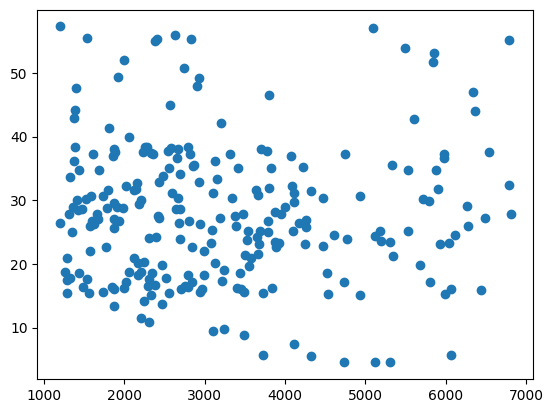

In [21]:
plt.scatter(prets['revenu'], prets['taux_endettement'])

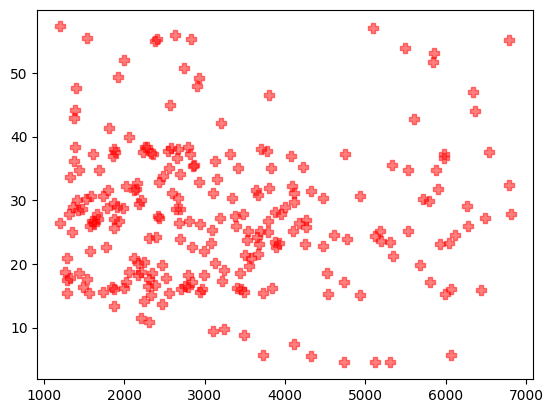

In [22]:
plt.scatter(prets['revenu'], prets['taux_endettement'],
    s=60, alpha=0.5, c='red', marker='P')

In [23]:
data = prets.groupby('ville')['remboursement'].sum()
data = data.reset_index()

([<matplotlib.patches.Wedge at 0x2e28282f2f0>,
 [Text(1.0735482898052735, 0.2397792098080497, 'BORDEAUX'),
  Text(0.7559779933342196, 0.7990602440331811, 'LYON'),
  Text(-0.22079479320563614, 1.0776129450286316, 'MARSEILLE'),
  Text(-0.9928563505107825, 0.4735359197045252, 'NICE'),
  Text(-0.3566773649937175, -1.0405677571889005, 'PARIS'),
  Text(1.0582353655336645, -0.30022976390396683, 'TOULOUSE')])

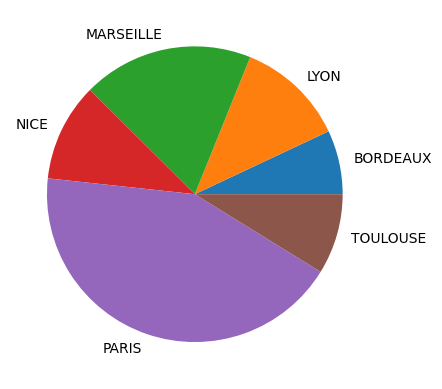

In [24]:
plt.pie(x=data['remboursement'], labels=data['ville'])

([<matplotlib.patches.Wedge at 0x2e282892d50>,
 [Text(1.0735482898052735, 0.2397792098080497, 'BORDEAUX'),
  Text(0.7559779933342196, 0.7990602440331811, 'LYON'),
  Text(-0.22079479320563614, 1.0776129450286316, 'MARSEILLE'),
  Text(-0.9928563505107825, 0.4735359197045252, 'NICE'),
  Text(-0.3566773649937175, -1.0405677571889005, 'PARIS'),
  Text(1.0582353655336645, -0.30022976390396683, 'TOULOUSE')],
 [Text(0.58557179443924, 0.1307886598952998, '6.99%'),
  Text(0.41235163272775605, 0.43585104219991694, '11.89%'),
  Text(-0.12043352356671061, 0.5877888791065262, '18.66%'),
  Text(-0.5415580093695176, 0.2582923198388319, '10.74%'),
  Text(-0.19455128999657315, -0.5675824130121274, '42.91%'),
  Text(0.5772192902910896, -0.1637616894021637, '8.80%')])

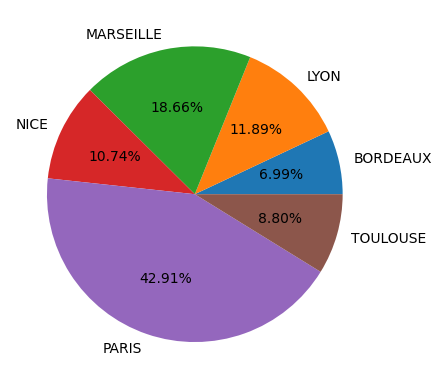

In [25]:
plt.pie(x=data['remboursement'], labels=data['ville'], autopct='%.2f%%')

<BarContainer object of 6 artists>

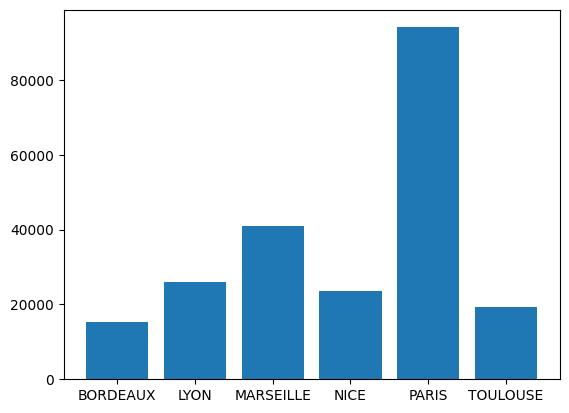

In [26]:
plt.bar(height=data['remboursement'], x=data['ville'])

<BarContainer object of 6 artists>

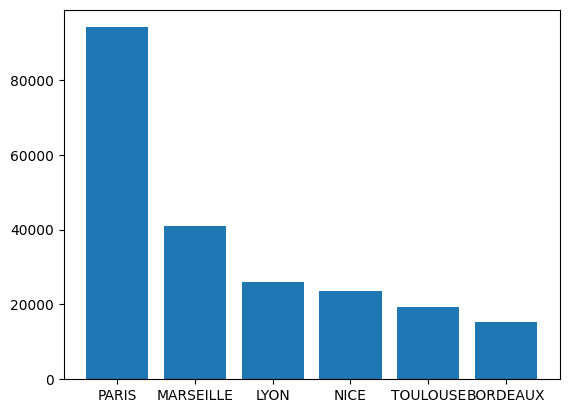

In [27]:
data_sorted = data.sort_values('remboursement', ascending=False)
plt.bar(height=data_sorted['remboursement'], x=data_sorted['ville'])

(array([38., 42., 43., 27., 31., 17., 10., 11., 15., 10.]),
 array([1200. , 1760.7, 2321.4, 2882.1, 3442.8, 4003.5, 4564.2, 5124.9,
        5685.6, 6246.3, 6807. ]),
 <BarContainer object of 10 artists>)

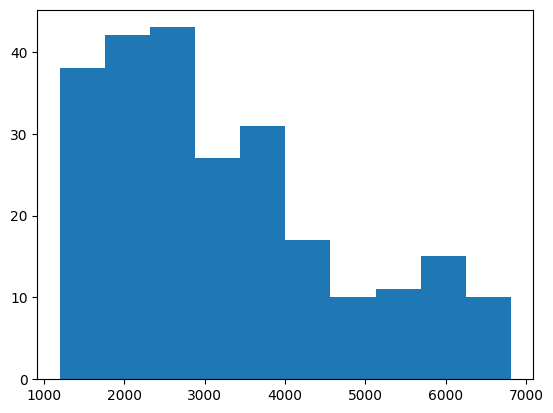

In [28]:
plt.hist(prets['revenu'])